In [2]:
import os
import json 
import argparse
import numpy as np
import math
import pickle
import datetime
import time
import logging
import itertools

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

You can specify an URL to an image:

In [9]:
#Manniques
#url = 'https://www.deco4shops.dk/media/com_mijoshop/opencart/image/cache//r/o/roy_r5101_white-800x800.jpg'
#url = 'https://static.turbosquid.com/Preview/2015/02/18__13_25_29/1.jpgcfab0d85-8957-4942-adde-67723890d821Large.jpg'
#url = 'https://st2.depositphotos.com/4157265/7124/i/950/depositphotos_71247555-stock-photo-utthita-tadasana-yoga-pose.jpg'

#Sitting Poses
#url = 'https://cdn.topofart.com/images/artists/John_Singer_Sargent/paintings/sargent029.jpg'
#Das Letzte Abendmahl
#url = 'https://i.pinimg.com/originals/8f/03/bd/8f03bdb00d78904c537b32896594e0ac.jpg'
#Crucifixation
#url = 'https://ae01.alicdn.com/kf/HTB1MrMFjL6H8KJjy0Fjq6yXepXat.jpg'
#DaVincis Man
#url = 'https://st.depositphotos.com/1006593/2674/i/950/depositphotos_26742907-stock-photo-da-vincis-vitruvian-man-isolated.jpg'
#Virgin of the Rocks
#url = 'https://i.pinimg.com/originals/45/7c/3f/457c3f16ee83bc55d1ecad8b4bf2e31e.jpg'
#url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Leonardo_Da_Vinci_-_Vergine_delle_Rocce_%28Louvre%29.jpg/560px-Leonardo_Da_Vinci_-_Vergine_delle_Rocce_%28Louvre%29.jpg'
#Neutral Pose
#url = 'https://www.deco4shops.dk/media/com_mijoshop/opencart/image/cache/catalog/Hindsgaul%20in%20stock/Roy%202015%20mail/Roy%20R5101%20Grey-800x800.jpg'
#David
#url = 'https://d7hftxdivxxvm.cloudfront.net/?resize_to=width&src=https%3A%2F%2Fd32dm0rphc51dk.cloudfront.net%2FbOWuf3Mlwnt6yxaQI5238A%2Flarge.jpg&width=1200&quality=80'
#Dürer Self-Portrait
#url = 'https://www.meisterdrucke.com/kunstwerke/500px/Albrecht%20Drer%20or%20Duerer%20-%20Study%20for%20Self%20Portrait%20with%20a%20Glove%20c1498%20-%20%28MeisterDrucke-305470%29.jpg'
#Leda and the Swan
#url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Leda_and_the_Swan_1510-1515.jpg/354px-Leda_and_the_Swan_1510-1515.jpg'
#Serpentine
#url = 'https://artsy-media-uploads.s3.amazonaws.com/CvWetZY2wzpGjdbU-YD1CQ%2FLibyanSibyl_SistineChapel.jpg'
#Cross-Legged Pose
#url = 'https://caufsociety.com/wp-content/uploads/2020/06/homeless-man-in-sf-california-983x737.jpg'
#url = 'https://i.pinimg.com/originals/d8/6e/16/d86e16a022c7c7d1ca6ebe1b67031d02.jpg'
#Adoration Pose
#url = 'https://i.pinimg.com/originals/83/15/28/831528e7216ce509b111b2952a70052c.jpg'
#Commander Pose
##url = 'https://d7hftxdivxxvm.cloudfront.net/?resize_to=width&src=https%3A%2F%2Fd32dm0rphc51dk.cloudfront.net%2FeuIB2YeHV82sM55WumEkyA%2Flarger.jpg&width=1200&quality=80'
#Renaissance Elbow
url = 'https://az333959.vo.msecnd.net/images-0/portrait-of-mattheus-van-den-broucke-1620-1685-councillor-of-the-indies-samuel-van-hoogstraten-1670-de22d661.jpg'
#Pudica
#url = 'https://d7hftxdivxxvm.cloudfront.net/?resize_to=width&src=https%3A%2F%2Fd32dm0rphc51dk.cloudfront.net%2FHbBnd8BAs1y2-_2tU8XDjA%2Flarger.jpg&width=1200&quality=80'

import urllib.request
urllib.request.urlretrieve(url, ".images/input_img.jpg")
imgpath = os.path.abspath(".images/input_img.jpg")

Or specify an image from the styletransfer art dataset:

In [1]:
imgpath = '/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000000785_050351.jpg'
imgpath = '/home/althausc/nfs/data/coco_17_medium/val2017_styletransfer/000000329455_015095.jpg'
imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/170.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers10k/63962.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/28598.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/58738.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/82917.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/95612.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/53443.jpg'
#imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/99878.jpg' #!
#imgpath = '/home/althausc/master_thesis_impl/scripts/branchkpts/.images/test_img.jpg'
#Renaissance Elbow
#imgpath = '/nfs/data/iart/kaggle/img/66792.jpg'

Show the loaded image:

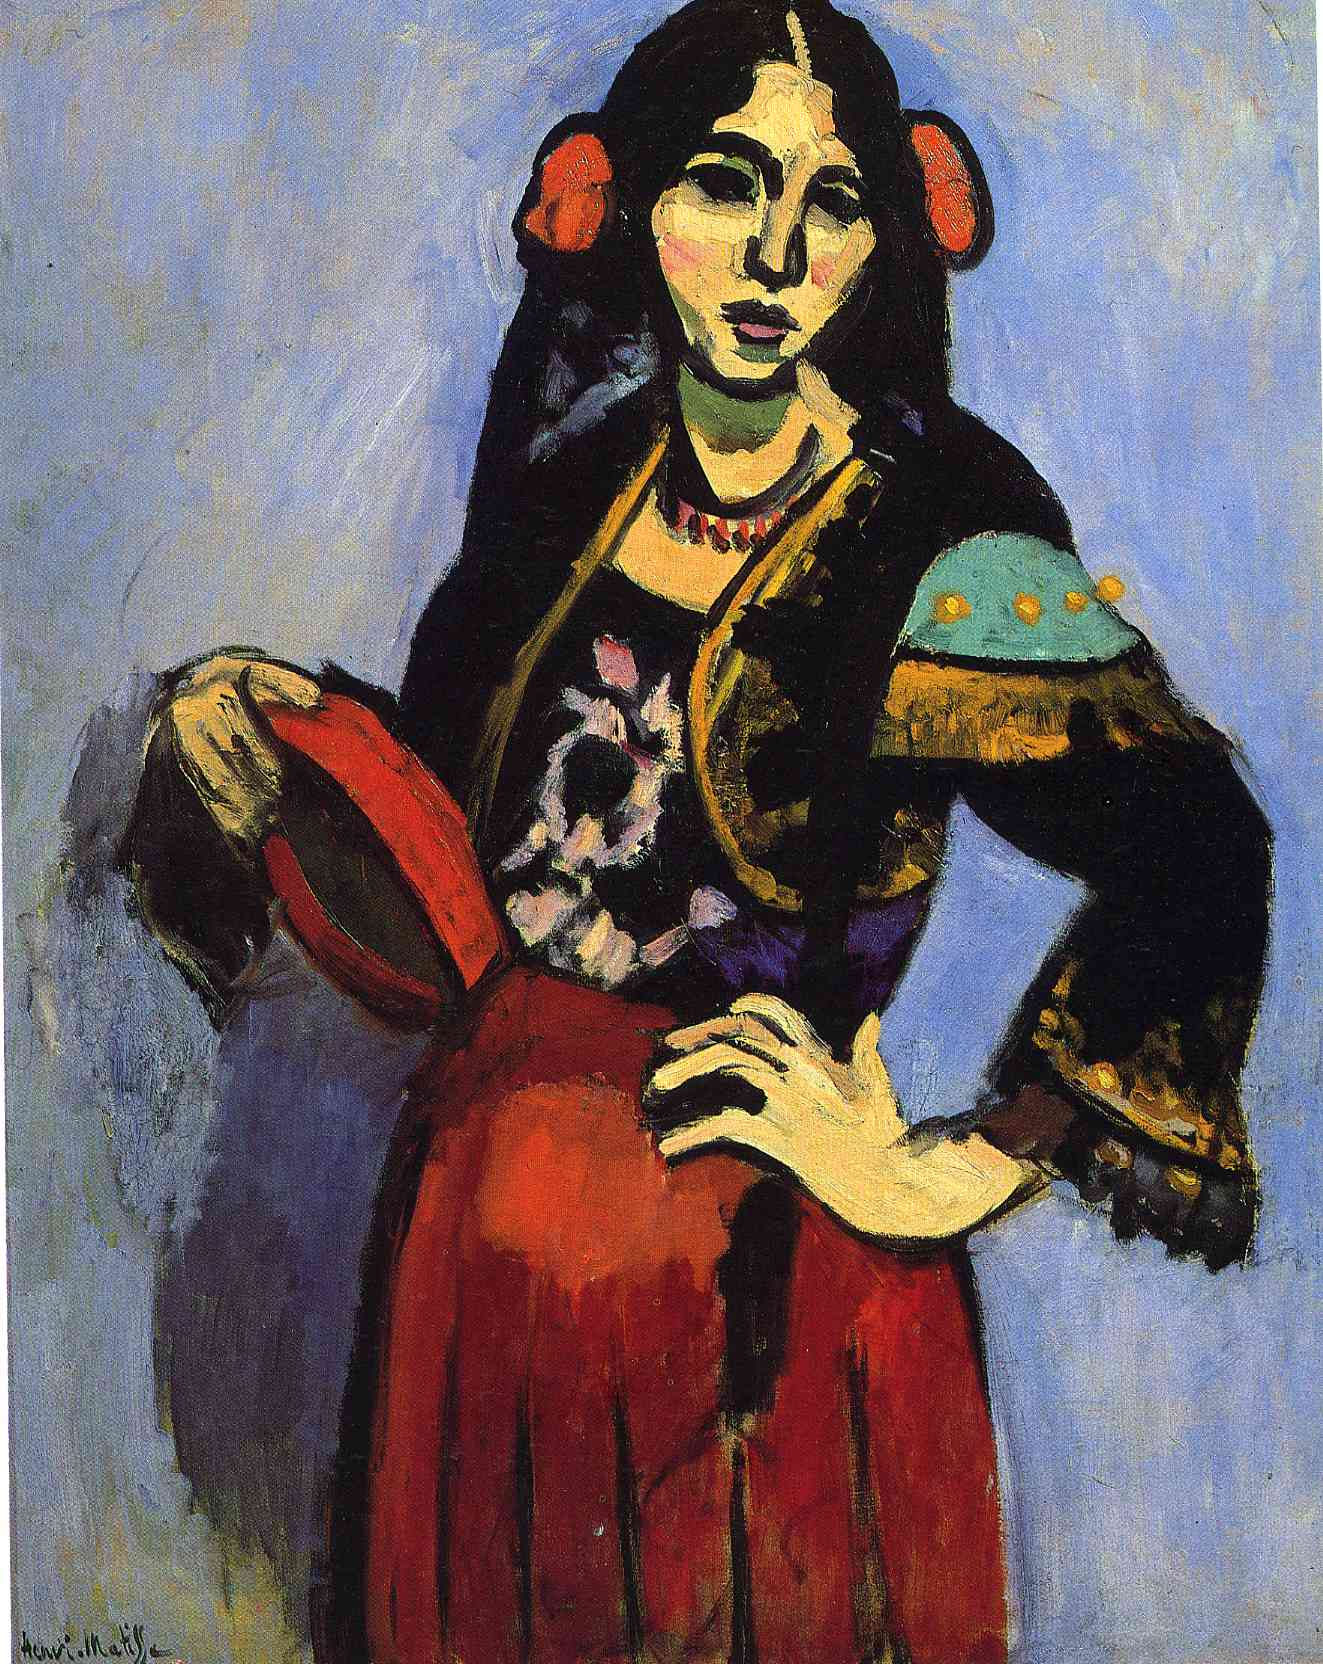

In [2]:
from IPython.display import Image, display
display(Image(filename=imgpath, width=640, unconfined=True))

Optional: Select sub-region of the image to catch a specific person

Output()

<IPython.core.display.Javascript object>


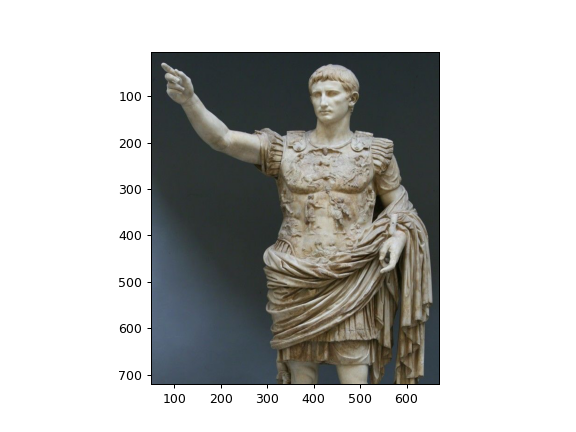

In [55]:
%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.widgets as widgets
from predict_search_modules import cropImage

from ipywidgets import Output
output = Output()
display(output)

@output.capture()
def onselect(eclick, erelease, resize=True):
    global imgpath
    if eclick.ydata>erelease.ydata:
        eclick.ydata,erelease.ydata=erelease.ydata,eclick.ydata
    if eclick.xdata>erelease.xdata:
        eclick.xdata,erelease.xdata=erelease.xdata,eclick.xdata
    p1 = [eclick.xdata, eclick.ydata]
    p2 = [erelease.xdata, erelease.ydata]
   
    ax.set_ylim(erelease.ydata,eclick.ydata)
    ax.set_xlim(eclick.xdata,erelease.xdata)
    #fig.canvas.draw(eclick.xdata,erelease.xdata) 
    
    imgpath = cropImage(imgpath, p1, p2, resize=resize)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
im = Image.open(imgpath)
arr = np.asarray(im)
plt_image=plt.imshow(arr)
rs=widgets.RectangleSelector(
    ax, onselect, drawtype='box',
    rectprops = dict(facecolor='red', edgecolor = 'black', alpha=0.5, fill=True))
plt.show()

---
Run keypoint inference:

In [23]:
from predict_search_modules import predict
annpath, imgname = predict(imgpath, queue=None)

MASK-RCNN PREDICTION ...
/home/althausc/master_thesis_impl/scripts/singularity/ubuntu_srun_G1d4-1.sh python3.6 /home/althausc/master_thesis_impl/scripts/detectron2/MaskRCNN_prediction.py -model_cp /home/althausc/master_thesis_impl/detectron2/out/checkpoints/11-16_16-28-06_scratch/model_final.pth -img /nfs/data/iart/kaggle/img/66792.jpg -topk 10 -score_tresh 0.95  -target query -visfiltered &> /home/althausc/master_thesis_impl/results/logs/jupyter-notebook/kptbranch/1-maskrcnn.txt
MASK-RCNN PREDICTION DONE.

VISUALIZE POSEFIX PREDICTIONS ...
/home/althausc/master_thesis_impl/scripts/singularity/ubuntu_run-1.sh python3.6 /home/althausc/master_thesis_impl/scripts/detectron2/utils/visualizekpts.py -file /home/althausc/master_thesis_impl/detectron2/out/art_predictions/query/01-18_10-24-58/maskrcnn_predictions.json -imagespath /nfs/data/iart/kaggle/img -outputdir /home/althausc/master_thesis_impl/scripts/branchkpts/.images -vistresh 0.1  &> /home/althausc/master_thesis_impl/results/logs/jupy

Visualize the predictions onto the image:

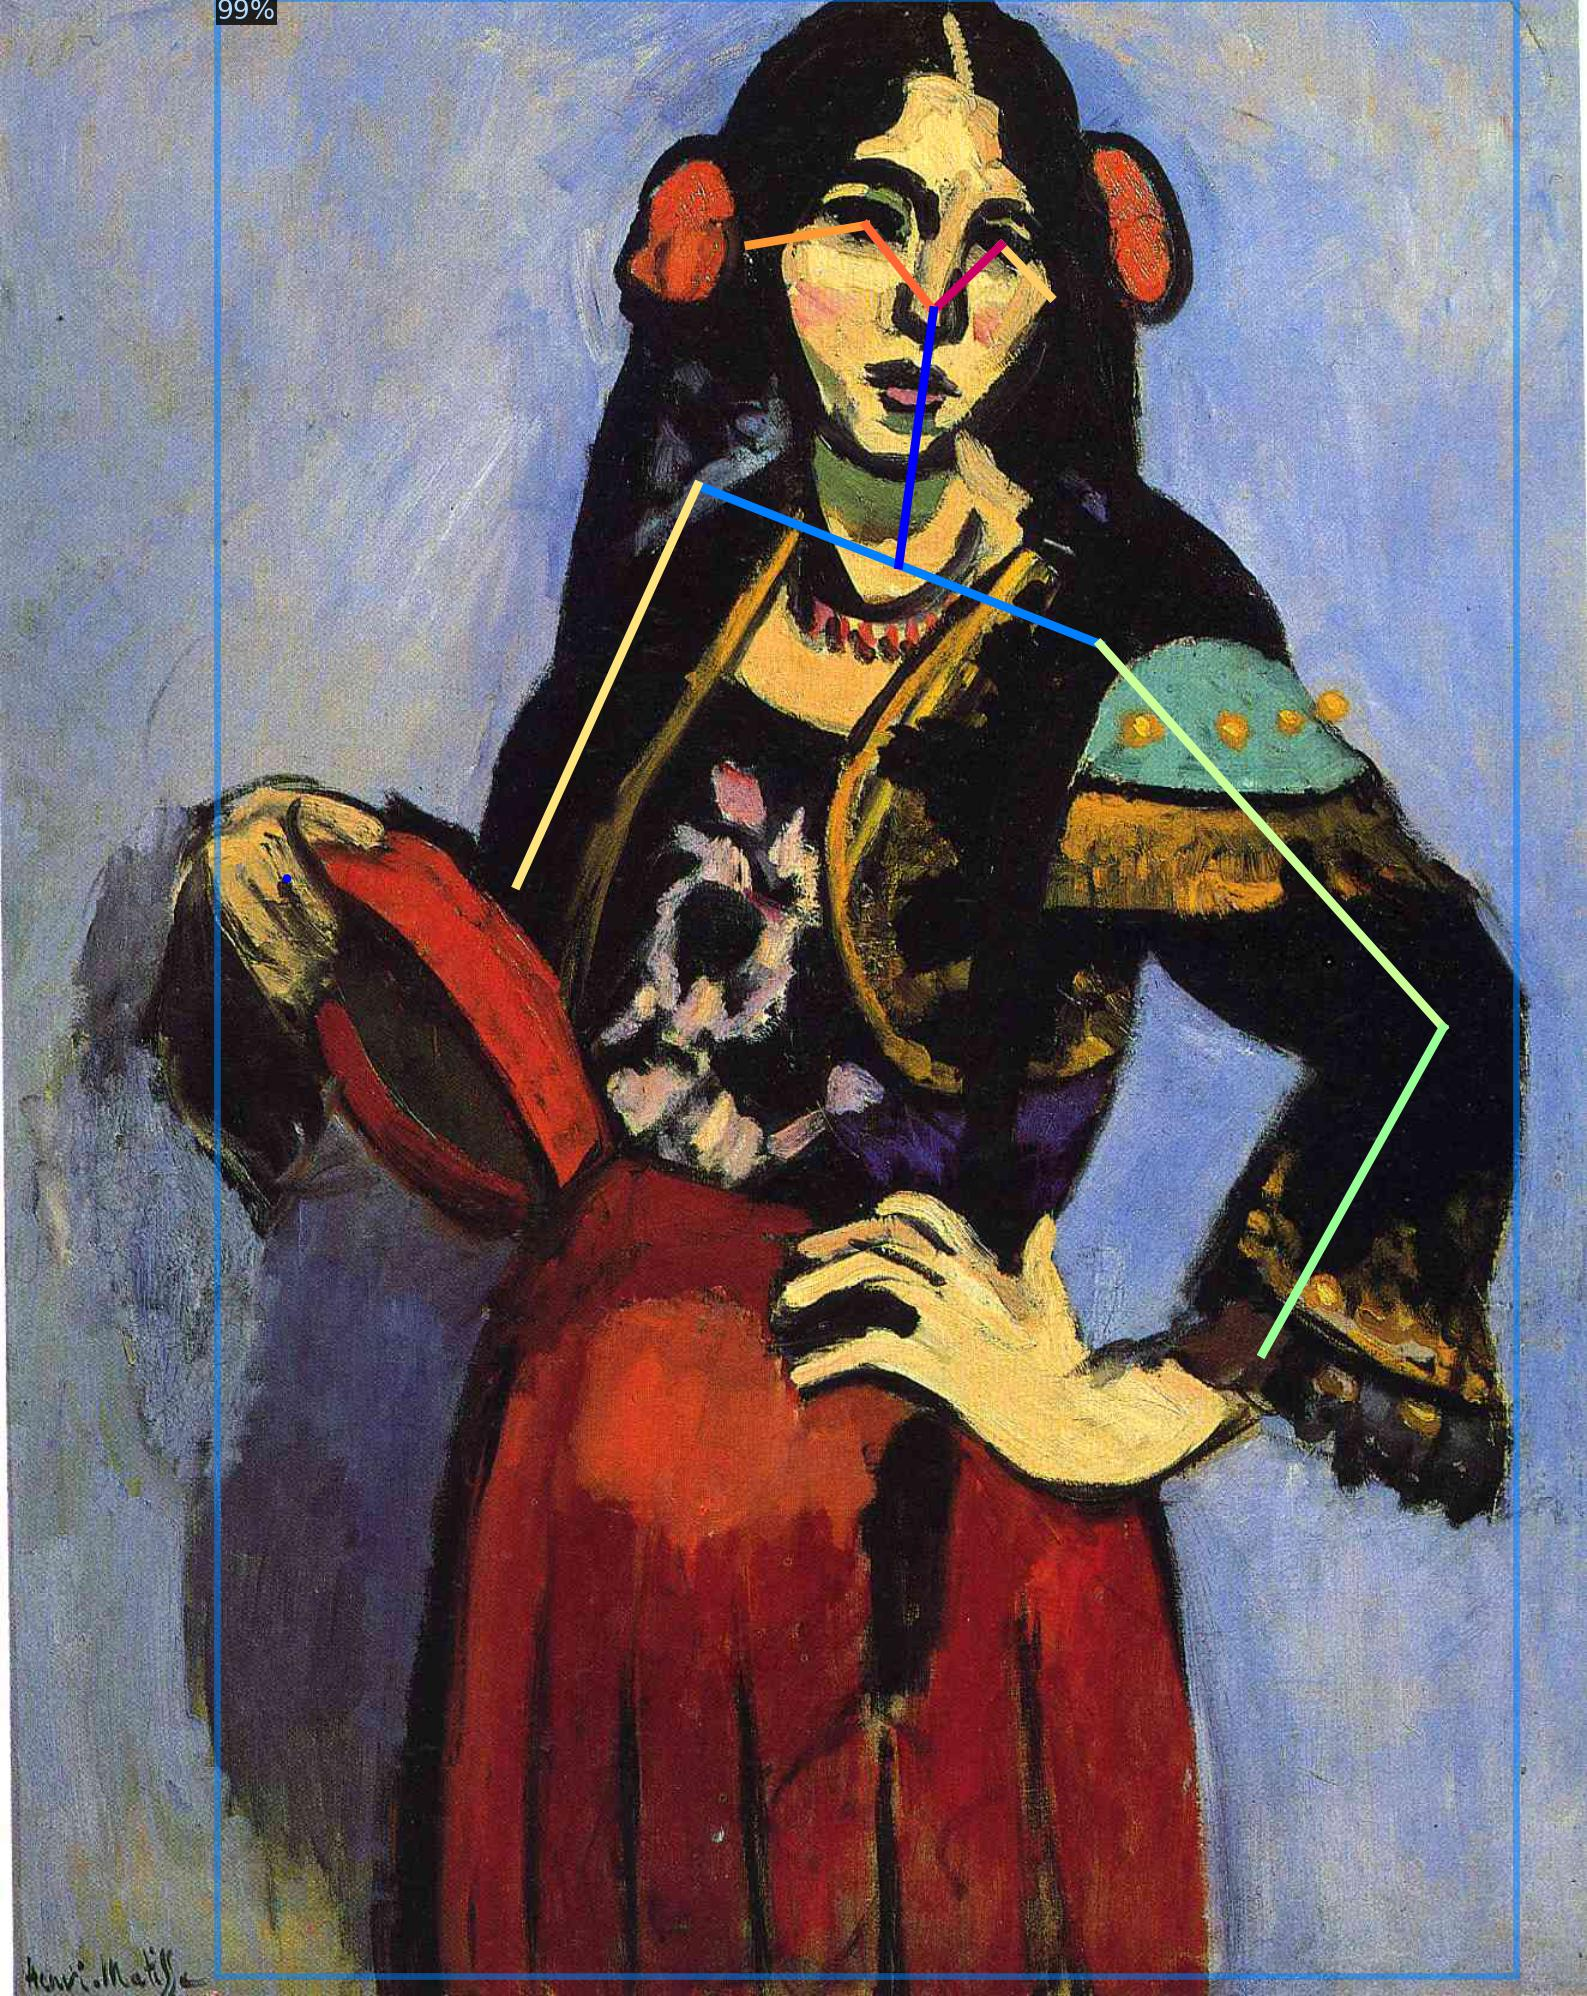

In [24]:
from IPython.display import Image, display
display(Image(filename=imgname))

---
Transform the predictions to a feature descriptor.
Please specify following parameters:
 - Method for constructing the feature vector 
 - PCA params, if necessary because of too many feature entries [Model only used when pca enabled]

In [28]:
from predict_search_modules import transform_to_gpd
methodgpd = 'JJo_reduced' #['JcJLdLLa_reduced', 'JLd_all', 'JJo_reduced', 'JLd_all_direct', 'Jc_rel']
pca_on = False #True #False
pca_model = '/home/althausc/master_thesis_impl/posedescriptors/out/insert/10-13_13-10-14/modelpca64.pkl'
flip = False #True

gpdfile = transform_to_gpd(annpath, methodgpd, pca_on, pca_model, flip)
print("GPD file: " ,gpdfile)

CALCULATE GPD DESCRIPTORS ...
python3.6 /home/althausc/master_thesis_impl/scripts/pose_descriptors/geometric_pose_descriptor.py -inputFile /home/althausc/master_thesis_impl/detectron2/out/art_predictions/query/01-18_10-24-58/maskrcnn_predictions.json -mode JJo_reduced  -target query &> /home/althausc/master_thesis_impl/results/logs/jupyter-notebook/kptbranch/4-gpd.txt
CALCULATE GPD DESCRIPTORS DONE.
Number of calculated descriptors:  1
GPD file:  /home/althausc/master_thesis_impl/posedescriptors/out/query/01-18_10-27-22/geometric_pose_descriptor_c_1_mJJo_reduced_t0.05_f1_mkpt7n1.json


---
Search for images in the database with similar arrangements of persons:

In [29]:
from predict_search_modules import search
method_search = 'L2' #['COSSIM', 'L1', 'L2']
percperson = True #False
rankingtype = 'max' #['average', 'max', 'querymultiple-firstn', 'querymultiple-average', 'querymultiple-samefreq'] note: querymultiple auto if flip=True
tresh = 0.95 #not used ?

#gpdfile = '/home/althausc/master_thesis_impl/posedescriptors/out/query/12-19_09-25-42/geometric_pose_descriptor_c_2_mJcJLdLLa_reduced_t0.05_f1_mkpt7n1.json'
#methodgpd = 'JJo_reduced' #['JcJLdLLa_reduced', 'JLd_all', 'JJo_reduced']

results = search(gpdfile, method_search, methodgpd, rankingtype, percperson, imgpath)
print("Result file: ", results)


SEARCH FOR GPD IN DATABASE...
GPD file:  /home/althausc/master_thesis_impl/posedescriptors/out/query/01-18_10-27-22/geometric_pose_descriptor_c_1_mJJo_reduced_t0.05_f1_mkpt7n1.json
python3.6 /home/althausc/master_thesis_impl/retrieval/elastic_search_init.py -file /home/althausc/master_thesis_impl/posedescriptors/out/query/01-18_10-27-22/geometric_pose_descriptor_c_1_mJJo_reduced_t0.05_f1_mkpt7n1.json -search -dbname paintersbynumbers -method_search L2 -gpd_type JJo_reduced  -search_personperc -rankingtype max -metadata_imgpath /nfs/data/iart/kaggle/img/66792.jpg &> /home/althausc/master_thesis_impl/results/logs/jupyter-notebook/kptbranch/5-search.txt



SEARCH FOR GPD IN DATABASE DONE.
GPD search returned 100 results.
Result file:  /home/althausc/master_thesis_impl/retrieval/out/humanposes/01-18_10-27-28/result-ranking.json


Display the search result:

In [10]:
#from widgets import displaySliderExecNexts
#from custom_widgets import sliderButtonExecNexts
from custom_widgets import floatslider
slider = floatslider()


In [14]:
import ipyplot
from predict_search_modules import getImgs, treshIndex, drawborder, getimg

tresh = 0.1 #slider.value
"""imgs, scores = getImgs(results, drawkpts=False)
queryim = drawborder(imgpath)
imgs.insert(0,queryim)

k = treshIndex(tresh, results)
k = len(imgs) #debug
#display(Image(filename=drawborder(imgpath)))
ipyplot.plot_images(imgs[:k], labels=None, scores=scores[:k], max_images=50, img_width=250, savedir=os.path.dirname(results))
return"""

results = '/home/althausc/master_thesis_impl/retrieval/out/humanposes/12-24_14-49-20/result-ranking.json'
imgpath = '/home/althausc/nfs/data/artimages/painterbynumbers1k/170.jpg'
methodgpd = 'Jc_rel'

resultfiles = []
import os
import random
for root, dirs, files in os.walk("/home/althausc/master_thesis_impl/retrieval/out/humanposes/", topdown=False):
    for name in files:
        if name == "result-ranking.json":
            resultfiles.append(os.path.join(root, name))
#print(resultfiles)

for n in range(10): #range(5,10):
    results = random.choice(resultfiles)
    imgs, scores = getImgs(results, drawkpts=False)
    if imgs == None:
        continue
    #queryim = drawborder(imgpath)
    queryim = getimg(imgpath)
    imgs.insert(0,queryim)

    k = treshIndex(tresh, results)
    k = len(imgs) #debug
    #display(Image(filename=drawborder(imgpath)))
    savefile = '/home/althausc/master_thesis_impl/flask/retrieval/{}/{}.html'.format(methodgpd, n+1)
    ipyplot.plot_images(imgs[:k], labels=None, scores=scores[:k], max_images=20, img_width=250, savefile=savefile, savedir=os.path.dirname(results))


Reading from file:  /home/althausc/master_thesis_impl/retrieval/out/humanposes/cropsearch/12-03_17-02-57-L2-halfimg/result-ranking.json
ERROR
Reading from file:  /home/althausc/master_thesis_impl/retrieval/out/humanposes/12-16_12-59-47/result-ranking.json
('0', {'filename': '1109.jpg', 'relscore': 1.0})
('1', {'filename': '39643.jpg', 'relscore': 0.6959403868931986})
('2', {'filename': '31770.jpg', 'relscore': 0.6681998959424335})
('3', {'filename': '92837.jpg', 'relscore': 0.6664830682356807})
('4', {'filename': '69524.jpg', 'relscore': 0.6617202426740363})
('5', {'filename': '71629.jpg', 'relscore': 0.6145539375514179})
('6', {'filename': '77076.jpg', 'relscore': 0.6138749055187265})
('7', {'filename': '52.jpg', 'relscore': 0.6041187949329231})
('8', {'filename': '13602.jpg', 'relscore': 0.5929487157471796})
('9', {'filename': '70915.jpg', 'relscore': 0.5924779507103092})
('10', {'filename': '4767.jpg', 'relscore': 0.5860256652367982})
('11', {'filename': '28628.jpg', 'relscore': 0.5